# PyCaret aplicado a problemas de regressão

## Sobre mim

1. Eu sou Henrique Santos e trabalho como analista de crédito e prevenção à fraude de uma empresa de telecomunicações chamada [DESKTOP](https://www.desktop.com.br/). 

2. Minha formação acadêmica:
   * **Graduação**: Ciências econômicas (UFPE);
   * **Mestrado**: Engenharia de produção (UFPE);
   * **Doutorado**: Biometria e estatística aplicada (UFRPE).
     * Tese disponível [aqui.](http://www.ppgbea.ufrpe.br/sites/www.ppgbea.ufrpe.br/files/documentos/tese_final_henrique_pinto_dos_santos_zaidan.pdf)

3. Atuação profissional:
    * Desde 2020, eu trabalho em ciência de dados, com foco em modelagem binária aplicada ao setor de *credit scoring*. Adicionalmente, já atuei com séries temporais, *churn*, *analytics* e *business intelligence* (BI).

## Contato
1. E-mail: santos.henrique624@gmail.com
2. Github: https://github.com/santoshenrique2021
3. Linkedin: https://www.linkedin.com/in/henriquesantos2021/

## PyCaret

O PyCaret é uma biblioteca de *machine learning* (aprendizado de máquina) em Python que apresenta uma interface amigável, utiliza poucas linhas de código e automatiza fluxos de trabalho.  É uma ferramenta abrangente no campo do aprendizado de máquina, pois desenvolve e gerencia modelos, acelerando significativamente o ciclo de experimentação e aumentando a produtividade. Além disso, ele funciona como um invólucro para várias bibliotecas de aprendizado de máquina disponíveis em Python.

### Áreas de aplicação:
1. **Regressão** (foco da apresentação);
2. Classificação;
3. Análise de cluster;
4. Séries temporais;
5. Detecção de anomalias.

### Documentação oficial

* https://pycaret.readthedocs.io/en/stable/

### Perspectiva acadêmica

Publicações acadêmicas que utilizaram esta biblioteca em problemas de *machine learning*:

1. https://www.sciencedirect.com/science/article/pii/S277237552400042X - artigo que classifica o nível de fertilização (2024).
2. https://www.sciencedirect.com/science/article/pii/S1674775523000720 - artigo que classifica o nível de solo (2023).
3. https://www.sciencedirect.com/science/article/abs/pii/S0048969724012828 - artigo que lida com a identificação de poluentes orgânicos persistentes (2024). 

## O que são problemas de regressão

* Problemas cujo foco é **prever uma variável quantitativa**, ou seja, **uma variável que apresenta um domínio real**, através de um conjunto de covariáveis.

### Aplicações em negócios

1. **Estimar a renda de uma pessoa** (**renda presumida**) - com base num conjunto de variáveis é possível estimar a renda de uma pessoa. Assim, idade, sexo, nível de educação, se declara (e/ou recebe) imposto de renda, limite de cartão de crédito, se tem patrimônio na bolsa de valores, se utiliza serviços públicos, se tem imóvel e\ou casa própria, volume de gastos (despesas de consumo), estado onde vive, se trabalha com carteira assinada, se recebe benefícios sociais e outras informações.
2. **Estimar a demanda de um produto** (**pricing optimization**) - com base num conjunto de variáveis é possível estimar a quantidade vendida de um produto. Assim, variáveis como **preço de venda** (principal variável), sazonalidade, custo das matérias-primas, preço dos concorrentes, preço do dólar (se o item apresentar componentes do exterior), no nível de inflação, tributação, situação econômica (recessão ou expansão da economia) e outas informações. Um artigo sobre isso: https://www.sciencedirect.com/science/article/pii/S2214716023000258.

## Ponto-chave

É muito mais fácil e menos custoso obter as covariáveis (as **variáveis explicativas**) do que a variável resposta (**ALVO**).

## Fluxo do machine learning (perspectiva de negócios)

![Fluxo do machine learning](ML_FLUXO.png)

## Exemplo

* **Prever o preço de um imóvel** (*target*/ ALVO) **com base num conjunto de variáveis quantitativas e qualitativas** (*features*).

In [1]:
#Bibliotecas básicas
import pandas as pd     #Manipulação dos dados
import numpy as np      #Operações multidimensionais e matemáticas
import matplotlib.pyplot as plt    #Gráficos
import matplotlib.ticker as ticker #Remover a notação científica do gráfico
import seaborn as sns              #Gráficos
##Machine learning
from pycaret.regression import * 
##Eliminar os warnings
import warnings
warnings.filterwarnings("ignore")
##Ver todas as colunas do data frame
pd.set_option('display.max_columns', None)
##Extrair os valores do feature importance
import sklearn as sk
#Definir o formato de exibição tipo float para evitar notação científica
pd.options.display.float_format = '{:.2f}'.format
#MAPE (métrica de avaliação)
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
##Extrair os valores do feature importance
import sklearn as sk

# 1 - Visão geral os dados

In [2]:
#Importar a base de dados
df =  pd.read_csv('base_dados.csv', sep = ';')
#Visualizar
df.head(3) #Visualizar as três primeiras linhas da tabela

,PRECO,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA
0,13300000,7420,4.00,2.00,3,SIM,NAO,NAO,NaN,SIM,2.00,SIM,SIM
1,12250000,8960,4.00,4.00,4,SIM,NAO,NaN,NAO,SIM,3.00,NAO,SIM
2,12250000,9960,NaN,2.00,2,SIM,NAO,SIM,NAO,NAO,2.00,SIM,PARCIALMENTE


In [3]:
#Características básicas do data frame - Parte 1
df.shape #545 observações e 13 variáveis 

(545, 13)

In [4]:
#Características básicas do data frame - Parte 2
df.info()#Nome da variável, contagem de observações não nulas e o tipo das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PRECO                   545 non-null    int64  
 1   AREA                    545 non-null    int64  
 2   QUARTOS                 493 non-null    float64
 3   BANHEIROS               465 non-null    float64
 4   ANDARES                 545 non-null    int64  
 5   FLAG_CENTRO             533 non-null    object 
 6   FLAG_QUARTO_HOSPEDE     545 non-null    object 
 7   FLAG_PORAO              510 non-null    object 
 8   FLAG_AGUA_MORNA         469 non-null    object 
 9   FLAG_AR_CONDICIONADO    541 non-null    object 
 10  VAGAS_ESTACIONAMENTO    503 non-null    float64
 11  FLAG_AREA_PREFERENCIAL  545 non-null    object 
 12  MOBILIADA               521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.5+ KB


# 2 - Análise exploratória dos dados

## 2.1 - Percentual de valores nulos de cada variável

In [5]:
#Tabela com o percentual de missing (percentual de valores nulos) de cada variável

#Calcular o percentual de valores nulos em cada coluna
percent_missing = df.isnull().mean() * 100

#Criar o data frame com as colunas renomeadas
df_perc_missing = percent_missing.reset_index()  #Reinicializa o índice e converte o índice em uma coluna
df_perc_missing = df_perc_missing.rename(columns={'index': 'VARIAVEL', 0: 'PERCENTUAL_MISSING'})
df_perc_missing

,VARIAVEL,PERCENTUAL_MISSING
0,PRECO,0.00
1,AREA,0.00
2,QUARTOS,9.54
3,BANHEIROS,14.68
4,ANDARES,0.00
5,FLAG_CENTRO,2.20
6,FLAG_QUARTO_HOSPEDE,0.00
7,FLAG_PORAO,6.42
8,FLAG_AGUA_MORNA,13.94
9,FLAG_AR_CONDICIONADO,0.73


* **Nota**: Se o percentual de *missing* de uma variável for muito elevado (superior a 70% - por exemplo), pode ser mais interessante removê-la da análise.
* **Nota**: Como lidar (e qual o impacto) com valores ausentes de uma variável na modelagem?

## 2.2 - Análise descritiva da variável resposta (PRECO)

In [6]:
#Sumário estatístico
df['PRECO'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

count        545.00
mean     4766729.25
std      1870439.62
min      1750000.00
10%      2835000.00
20%      3290000.00
30%      3605000.00
40%      3990000.00
50%      4340000.00
60%      4830000.00
70%      5418000.00
80%      6093500.00
90%      7350000.00
max     13300000.00
Name: PRECO, dtype: float64

In [7]:
#Coeficiente de variação - variabilidade em torno da média
round(100 * df['PRECO'].std()/df['PRECO'].mean(),2) #39.24 #Variabilidade em nível mediano

39.24

### 2.2.1 - Representação gráfica

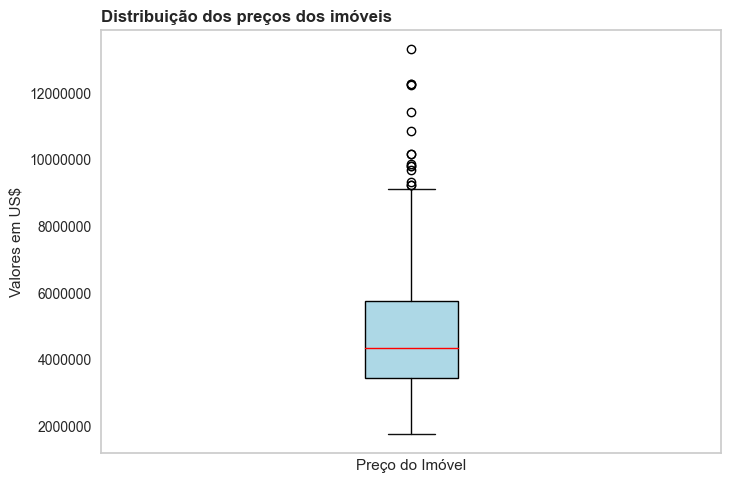

In [8]:
#Boxplot
boxplot = df.boxplot(column='PRECO', grid=False,  patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
boxplot.set_title('Distribuição dos preços dos imóveis', fontweight='bold',  loc='left')

#Eixo Y
plt.ylabel('Valores em US$')

#Eixo X
plt.xticks([])
plt.xlabel('Preço do Imóvel')


#Personalizar o eixo y para evitar a notação científica
boxplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

In [9]:
#Identificar as observações que são outliers
q1 = np.percentile(df.PRECO, 25) #Primeiro Quartil
q3 = np.percentile(df.PRECO, 75) #Terceiro Quartil

#Calcular a amplitude interquartil (IQR)
iqr = q3 - q1

#Definir os limites para identificação de outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Identificar outliers
outliers = [x for x in df.PRECO if x < lower_bound or x > upper_bound]

#Visualização
print("Outliers:", outliers)

Outliers: [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000, 9800000, 9681000, 9310000, 9240000, 9240000]


In [10]:
#Total de observações que são outliers
len(outliers) #15

15

In [11]:
#A partir de que valor a observação é um outlier
upper_bound = q3 + 1.5 * iqr
upper_bound #9.205.000

9205000.0

**Nota**: Como fica a previsão do PRECO para as observações que são outliers?

## 2.3 - Análise das variáveis explicativas quantitativas 

In [12]:
#Extraíndo as variáveis que são do tipo FLOAT e INT
tipos_desejados = ['int64', 'float64']
colunas_desejadas = [coluna for coluna in df.select_dtypes(include=tipos_desejados) if coluna != 'PRECO']

In [13]:
#EDA das variáveis numéricas
for coluna in colunas_desejadas:
    print(f"--- {coluna} ---")
    print(f"Média: {df[coluna].mean()}")
    print(f"Mediana: {df[coluna].median()}")
    print(f"Máximo: {df[coluna].max()}")
    print(f"Mínimo: {df[coluna].min()}")
    print(f"Desvio Padrão: {df[coluna].std()}")
    print(f"Coeficiente de variação: {df[coluna].std()/df[coluna].mean() * 100}")
    print()

--- AREA ---
Média: 5150.54128440367
Mediana: 4600.0
Máximo: 16200
Mínimo: 1650
Desvio Padrão: 2170.141022508803
Coeficiente de variação: 42.13423216468911

--- QUARTOS ---
Média: 2.9655172413793105
Mediana: 3.0
Máximo: 6.0
Mínimo: 1.0
Desvio Padrão: 0.7413646408469085
Coeficiente de variação: 24.99950533088412

--- BANHEIROS ---
Média: 1.2731182795698925
Mediana: 1.0
Máximo: 4.0
Mínimo: 1.0
Desvio Padrão: 0.4919918577933631
Coeficiente de variação: 38.6446307219449

--- ANDARES ---
Média: 1.8055045871559634
Mediana: 2.0
Máximo: 4
Mínimo: 1
Desvio Padrão: 0.8674924629255264
Coeficiente de variação: 48.047092712846734

--- VAGAS_ESTACIONAMENTO ---
Média: 0.6918489065606361
Mediana: 0.0
Máximo: 3.0
Mínimo: 0.0
Desvio Padrão: 0.8691670470118801
Coeficiente de variação: 125.62960478361371



**Nota**: Saber **identificar a dispersão e o seu range de valores (variabilidade e cardinalidade)**. 
* Exemplo: A variável *VAGAS_ESTACIONAMENTO*, observa-se que muitas casas tem poucas ou nenhuma vaga de estacionamento para carros e poucas residências tem muitas - **alta dispersão**.

## 2.4 - Análise descritiva das variáveis categóricas 

In [14]:
#As classes de cada variável categórica e sua frequência relativa
for coluna in df.select_dtypes(include = "object"):
    print (f"{coluna}:\n{df[coluna].value_counts(True)}")

FLAG_CENTRO:
SIM   0.86
NAO   0.14
Name: FLAG_CENTRO, dtype: float64
FLAG_QUARTO_HOSPEDE:
NAO   0.82
SIM   0.18
Name: FLAG_QUARTO_HOSPEDE, dtype: float64
FLAG_PORAO:
NAO   0.64
SIM   0.36
Name: FLAG_PORAO, dtype: float64
FLAG_AGUA_MORNA:
NAO   0.95
SIM   0.05
Name: FLAG_AGUA_MORNA, dtype: float64
FLAG_AR_CONDICIONADO:
NAO   0.69
SIM   0.31
Name: FLAG_AR_CONDICIONADO, dtype: float64
FLAG_AREA_PREFERENCIAL:
NAO   0.77
SIM   0.23
Name: FLAG_AREA_PREFERENCIAL, dtype: float64
MOBILIADA:
PARCIALMENTE   0.42
NAO            0.32
SIM            0.26
Name: MOBILIADA, dtype: float64


**Nota**: Saber identificar a **frequência relativa das classes da variável categórica**, no sentido de avaliar **pontos de concentração**.
* Exemplo: A variável FLAG_AGUA_MORNA concentra que 95% das casas não tem água morna.

**Nota**: As seções 2.3 e 2.4 representaram análises univariadas. 

**Ideia**: Com as estatísticas obtidas das variáveis independentes seria possível criar uma ***PERSONA*, ou seja, o perfil médio das casas**. Poderia também pensar numa análise de agrupamento ou aplicar regras de negócio no contexto de segmentação.

## 2.5 - Análise bivariada (distribuição conjunta)

* Quantificar o efeito das covariáveis na distribuição da variável resposta. 

**ALVO vs variáveis categóricas**

In [15]:
#Lista de colunas categóricas
colunas_categoricas = df.select_dtypes(include='object').columns

In [16]:
#Iterando sobre as colunas categóricas
for coluna in colunas_categoricas:
    print(f"Análise bivariada {coluna}:")
    summary = df.groupby([coluna])['PRECO'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    summary.columns = ['Média', 'Mediana', 'Desvio Padrão', 'Percentil 25', 'Percentil 75']
    print(summary)
    print('\n')

Análise bivariada FLAG_CENTRO:
                 Média    Mediana  Desvio Padrão  Percentil 25  Percentil 75
FLAG_CENTRO                                                                 
NAO         3397666.45 3272500.00      900614.22    2835000.00    3990000.00
SIM         5016303.70 4620000.00     1907611.03    3633000.00    6020000.00


Análise bivariada FLAG_QUARTO_HOSPEDE:
                         Média    Mediana  Desvio Padrão  Percentil 25  \
FLAG_QUARTO_HOSPEDE                                                      
NAO                 4544545.62 4165000.00     1827182.14    3347750.00   
SIM                 5792896.91 5495000.00     1727828.72    4690000.00   

                     Percentil 75  
FLAG_QUARTO_HOSPEDE                
NAO                    5258750.00  
SIM                    6419000.00  


Análise bivariada FLAG_PORAO:
                Média    Mediana  Desvio Padrão  Percentil 25  Percentil 75
FLAG_PORAO                                                             

**Nota**: A distribuição do *PRECO* é muito sensível com a variável *FLAG_CENTRO*.

**ALVO vs variáveis numéricas**

1. **Correlação**
    * Correlação das variáveis explicativas com o ALVO e entre elas.

**Mapa de calor**

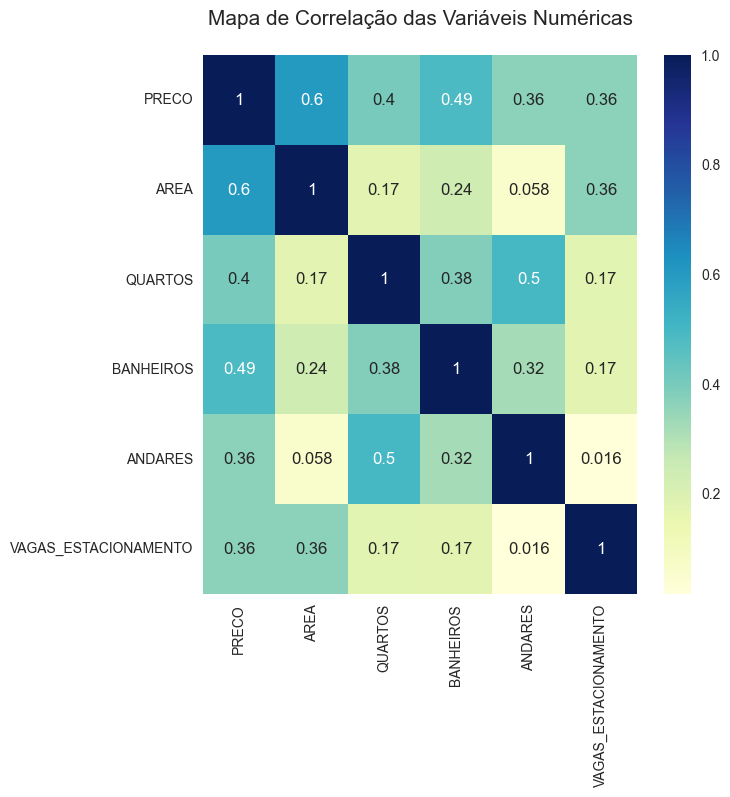

In [17]:
#Heatmap
#Data frame com as colunas numéricas
df_numerical = df.select_dtypes(include=['int', 'float'])
#Correlação
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

**Tabela de correlação**

In [18]:
#Tabela de correlação
tabela_correlacao_spearman = df_numerical.corr(method='spearman') #Não preciso assumir uma relação linear entre as variáveis e não tem hipótese sobre a distribuição normal
tabela_correlacao_spearman #A variável AREA tem a maior correlação com preço.

,PRECO,AREA,QUARTOS,BANHEIROS,ANDARES,VAGAS_ESTACIONAMENTO
PRECO,1.00,0.60,0.40,0.49,0.36,0.36
AREA,0.60,1.00,0.17,0.24,0.06,0.36
QUARTOS,0.40,0.17,1.00,0.38,0.50,0.17
BANHEIROS,0.49,0.24,0.38,1.00,0.32,0.17
ANDARES,0.36,0.06,0.50,0.32,1.00,0.02
VAGAS_ESTACIONAMENTO,0.36,0.36,0.17,0.17,0.02,1.00


2. **Scatter Plot** (Gráfico de Dispersão)

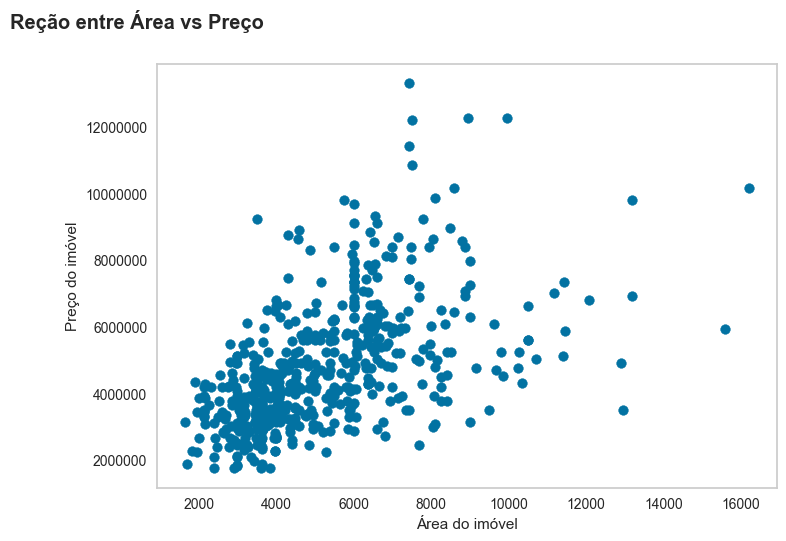

In [20]:
#Scatter plot
plt.scatter(df.AREA, df.PRECO)

#Adicionar rótulos aos eixos
plt.xlabel('Área do imóvel')
plt.ylabel('Preço do imóvel')

#Adicionar título ao gráfico
plt.suptitle('Reção entre Área vs Preço', fontweight='bold', x=0.1)

#Remover linhas de grade
plt.grid(False)

#Remover notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

#Exibir o gráfico
plt.show()

#### Análise adicional (feature engineering)

* Criar uma variável a partir de uma existente. Posteriormente, compará-la com o ALVO.
* Vou criar a variável chamada **DECIL_AREA**.

In [21]:
#Variável que vai calcular os decis da variável AREA
decis_area = pd.qcut(df['AREA'], q=10)
#Adicionar a variável DECIL_AREA
df['DECIL_AREA'] = decis_area

In [22]:
#Calcular o preço médio do imóvel para cada faixa de decil da área
preco_medio_por_decil = df.groupby('DECIL_AREA')['PRECO'].mean()
preco_medio_por_decil #Transformou uma variável quantitativa numa variável qualitativa

DECIL_AREA
(1649.999, 3000.0]   3363075.76
(3000.0, 3450.0]     3589402.17
(3450.0, 3664.0]     3644980.77
(3664.0, 4065.0]     3943981.48
(4065.0, 4600.0]     4495957.63
(4600.0, 5400.0]     4639084.91
(5400.0, 6000.0]     5850008.62
(6000.0, 6600.0]     5953428.57
(6600.0, 7980.0]     6164785.93
(7980.0, 16200.0]    6170888.89
Name: PRECO, dtype: float64

In [23]:
#Visualização final do data frame
df.head(3) #Temos uma nova coluna

,PRECO,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,DECIL_AREA
0,13300000,7420,4.00,2.00,3,SIM,NAO,NAO,NaN,SIM,2.00,SIM,SIM,"(6600.0, 7980.0]"
1,12250000,8960,4.00,4.00,4,SIM,NAO,NaN,NAO,SIM,3.00,NAO,SIM,"(7980.0, 16200.0]"
2,12250000,9960,NaN,2.00,2,SIM,NAO,SIM,NAO,NAO,2.00,SIM,PARCIALMENTE,"(7980.0, 16200.0]"


# 3 - Modelagem (PyCaret)

## 3.1 - Setup

* Esta função tem vários parâmetros e, de forma geral, ela prepara o ambiente de modelagem e carrega os dados para o treinamento do modelo.

In [24]:
exp = setup(df, target = 'PRECO', session_id = 1935, train_size = 0.65, ignore_features=['DECIL_AREA'],
            normalize = True, normalize_method = 'robust', numeric_imputation = 'median',
            categorical_imputation = 'mode', encoding_method= None, experiment_name= "EXP_REGRESSAO")

,Description,Value
0,Session id,1935
1,Target,PRECO
2,Target type,Regression
3,Original data shape,"(545, 14)"
4,Transformed data shape,"(545, 15)"
5,Transformed train set shape,"(354, 15)"
6,Transformed test set shape,"(191, 15)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,7


In [25]:
#Base de treino transformada
X = get_config('X_train_transformed')
X

,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA_PARCIALMENTE,MOBILIADA_SIM,MOBILIADA_NAO
229,1.80,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
114,0.78,0.00,0.00,-1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
405,-0.55,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
81,-0.21,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
469,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.56,1.00,1.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
288,0.16,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
413,-0.94,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
96,1.56,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [26]:
#Base de teste
df_teste = get_config('test')
#Visualização
df_teste.head(3)

,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000


## 3.2 - Compare models

* Esta função treina e avalia o desempenho de todos os estimadores disponíveis através da abordagem do cross-validation.

In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,806223.4913,1183143361823.1270,1070103.3304,0.6391,0.2162,0.1790,0.0820
lr,Linear Regression,808099.6608,1183680271069.2190,1070783.8993,0.6381,0.2166,0.1795,1.6190
lasso,Lasso Regression,808793.5285,1185587967866.8933,1071390.6423,0.6378,0.2166,0.1796,0.1070
lar,Least Angle Regression,808794.1855,1185587417187.4290,1071390.4613,0.6378,0.2166,0.1796,0.0730
llar,Lasso Least Angle Regression,808793.5281,1185587884234.5540,1071390.5907,0.6378,0.2166,0.1796,0.0790
rf,Random Forest Regressor,819440.3339,1313736891126.1924,1119946.3766,0.6064,0.2215,0.1791,0.2360
catboost,CatBoost Regressor,821447.4629,1341149795279.2026,1128870.2686,0.6003,0.2220,0.1782,1.6530
knn,K Neighbors Regressor,813610.1111,1403636052864.0178,1161672.1638,0.5821,0.2271,0.1732,0.0770
huber,Huber Regressor,851716.8705,1449678292436.4058,1174461.8991,0.5767,0.2295,0.1850,0.0820
gbr,Gradient Boosting Regressor,863388.3808,1426780891618.6287,1162293.7877,0.5751,0.2279,0.1880,0.1350


Ridge(random_state=1935)

### 3.2.1 - KPI: MAPE (Erro Médio Percentual Absoluto)

#### Explicação 

* o MAPE indica, em média, o quão distantes estão as previsões dos valores reais, em termos percentuais. Quanto menor o valor do MAPE, mais precisa é a previsão. Por exemplo, um MAPE de 5% indica que, em média, as previsões estão, em média, a 5% dos valores reais (seja para mais ou menos).

#### Estratégia

* Escolher os três modelos com o menor MAPE no cross-validação e avaliá-los na base de teste. Posteriormente, selecionar o modelo com o menor MAPE da base de teste.

#### Fórmula

**MAPE** = (1/n) * Σ(|(A - F) / A|) * 100

#### Notação

* A é o valor real;
* F é o valor previsto;
* n é o número total de observações na amostra,
* Σ representa a soma sobre todas as observações,
* | | representa o valor absoluto.



## 3.3 - Create model

* Esta função treina e avalia o desempenho de um determinado estimador utilizando a abordagem do cross-validation.

**Regressão Ridge**

In [28]:
#Resultado da base de treino
model_1 = create_model('ridge') #Na base de treino se aplica o cross validação
model_1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,765781.1954,1007124951042.1052,1003556.1524,0.6901,0.2016,0.1637
1,826556.9933,1363799422932.7646,1167818.2320,0.4826,0.2520,0.2014
2,776175.8395,1015276374092.3228,1007609.2368,0.6313,0.2299,0.1960
3,803265.2289,1125076554307.5322,1060696.2592,0.7027,0.2093,0.1732
4,783566.9921,1084764466165.2152,1041520.2668,0.7814,0.2161,0.1827
5,925844.4457,1226015320970.7644,1107255.7613,0.5525,0.2554,0.2306
6,670405.6540,792490613639.7515,890219.4188,0.6601,0.1734,0.1364
7,1054248.2482,2485438656921.6260,1576527.4044,0.5819,0.2410,0.1899
8,783302.5168,1083742737777.5100,1041029.6527,0.5888,0.2199,0.1714


Ridge(random_state=1935)

In [29]:
#Avaliar o modelo na base de teste
df_teste_1 = predict_model(model_1, data = df_teste)
#Visualização
df_teste_1.head(3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,864982.2295,1483558401613.4270,1218014.1221,0.5898,0.2353,0.1906


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO,prediction_label
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000,4280601.61
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000,7497377.68
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000,6205556.06


In [30]:
mape_1 = mean_absolute_percentage_error(df_teste_1.PRECO, df_teste_1.prediction_label)
print("MAPE:", round(100 * mape_1,2)) #MAPE: 19.06

MAPE: 19.06


**Regressão Linear**

In [31]:
model_2 = create_model('lr') 
model_2

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,763023.9854,1006603533750.7670,1003296.3340,0.6902,0.2016,0.1630
1,830869.3485,1370207603034.4512,1170558.6713,0.4802,0.2526,0.2023
2,784455.2478,1022622748089.6100,1011248.1140,0.6286,0.2306,0.1975
3,804489.7582,1126236212172.0452,1061242.7678,0.7024,0.2102,0.1739
4,780303.4044,1066982628256.9095,1032948.5119,0.7850,0.2150,0.1820
5,935764.8868,1254821437405.2664,1120188.1259,0.5420,0.2583,0.2333
6,673195.2388,793959634110.5077,891044.1258,0.6595,0.1735,0.1370
7,1048735.7714,2461955668847.5430,1569062.0347,0.5858,0.2409,0.1893
8,781693.8648,1074988301418.0668,1036816.4261,0.5921,0.2194,0.1712


LinearRegression(n_jobs=-1)

In [32]:
#Avaliar o modelo na base de teste
df_teste_2 = predict_model(model_2, data = df_teste)
#Visualização
df_teste_2.head(3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,865368.4712,1483718782335.0151,1218079.9573,0.5897,0.2355,0.1907


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO,prediction_label
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000,4270411.66
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000,7511460.26
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000,6209932.76


In [33]:
mape_2 = mean_absolute_percentage_error(df_teste_2.PRECO, df_teste_2.prediction_label)
print("MAPE:", round(100 * mape_2,2)) #MAPE: 19.07

MAPE: 19.07


**K Neighbors Regressor**

In [34]:
model_3 = create_model('knn') 
model_3

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,872161.1111,1179786883333.3333,1086179.9498,0.6369,0.2193,0.1843
1,753514.2222,1408669492259.5557,1186873.8317,0.4656,0.2520,0.1772
2,761389.2222,1339719792870.6667,1157462.6529,0.5135,0.2417,0.1873
3,860672.5556,1523796274426.2222,1234421.4331,0.5973,0.2310,0.1732
4,906603.2000,1819275740038.3999,1348805.3010,0.6334,0.2386,0.1893
5,660484.0000,827017570960.0000,909405.0643,0.6982,0.2110,0.1658
6,757433.6000,860584517676.8000,927676.9468,0.6309,0.1979,0.1526
7,1044643.2000,2898230159238.3999,1702418.9141,0.5124,0.2519,0.1806
8,855796.8000,1416915359238.3999,1190342.5386,0.4623,0.2414,0.1793


KNeighborsRegressor(n_jobs=-1)

In [35]:
#Avaliar o modelo na base de teste
df_teste_3 = predict_model(model_3, data = df_teste)
#Visualização
df_teste_3.head(3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,912469.5707,1841770113303.8325,1357118.3122,0.4907,0.2624,0.2010


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO,prediction_label
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000,4053000.00
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000,6713000.00
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000,7446600.00


In [36]:
mape_3 = mean_absolute_percentage_error(df_teste_3.PRECO, df_teste_3.prediction_label)
print("MAPE:", round(100 * mape_3,2)) #MAPE: 20.01

MAPE: 20.1


## 3.4 - Tune model (opcional)

* Esta função visa encontrar uma nova combinação de hiperparâmetros que possa melhorar a performance do modelo.
* O melhor modelo foi o ridge.

In [37]:
tune_model_1 = tune_model(model_1, optimize = 'MAPE', search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,781770.9552,1024043253278.4562,1011950.2227,0.6849,0.2028,0.1676
1,806293.7549,1330114708337.5251,1153305.9908,0.4954,0.2497,0.1982
2,742633.1187,978184214911.2654,989031.9585,0.6448,0.2265,0.1906
3,802551.2070,1141203638735.7065,1068271.3320,0.6984,0.2054,0.1702
4,806466.6965,1214359403281.2317,1101979.7654,0.7553,0.2246,0.1875
5,876467.0340,1088633968941.3744,1043376.2356,0.6027,0.2417,0.2189
6,651995.8438,782230199055.6571,884437.7870,0.6645,0.1729,0.1331
7,1043469.1947,2531704467352.8472,1591133.0766,0.5741,0.2408,0.1872
8,783412.8877,1116338560199.9797,1056569.2406,0.5764,0.2222,0.1715


In [38]:
#Avaliar o modelo tunado na base de teste
df_teste_tune = predict_model(tune_model_1, data = df_teste)
#Visualização
df_teste_tune.head(3) #MAPE: 0.1903

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,862201.6007,1488530429910.3167,1220053.4537,0.5884,0.2352,0.1903


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO,prediction_label
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000,4348887.34
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000,7382806.09
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000,6167051.87


In [39]:
mape_final = mean_absolute_percentage_error(df_teste_tune.PRECO, df_teste_tune.prediction_label)
print("MAPE:", round(100 * mape_final,2)) #MAPE: 19.03

MAPE: 19.03


In [40]:
#Hiperparâmetro
print(tune_model_1) #alpha=8.834073845174547

Ridge(alpha=9.890530084316655, random_state=1935)


## 3.5 - Avaliação de desempenho

In [41]:
#Panorama geral dos resultados
evaluate_model(tune_model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
#Top 10 variáveis
plot_model(tune_model_1, plot = 'feature', save=True)

'Feature Importance.png'

In [43]:
#Ordem de importância de todas as variáveis
plot_model(tune_model_1, plot = 'feature_all', save=True)

'Feature Importance (All).png'

In [44]:
#Criar um data frame do feature importance
feature_importance = tune_model_1.coef_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
df_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'])
df_importance.to_csv("feature_importance.csv", sep=";")
df_importance


,Feature,Importance
0,BANHEIROS,717640.82
1,FLAG_AR_CONDICIONADO,697089.51
2,AREA,675750.09
3,ANDARES,609420.43
4,FLAG_QUARTO_HOSPEDE,543570.30
5,FLAG_AREA_PREFERENCIAL,538875.99
6,FLAG_AGUA_MORNA,525014.19
7,FLAG_PORAO,492018.60
8,VAGAS_ESTACIONAMENTO,306445.23
9,FLAG_CENTRO,300032.68


In [45]:
#Intercepto estimado
tune_model_1.intercept_ #3823378.2973213797

3823378.2973213797

In [46]:
#Salvar o erro
plot_model(tune_model_1, plot = 'error', save=True)

'Prediction Error.png'

In [47]:
#Salvar os resíduos
plot_model(tune_model_1, plot = 'residuals', save=True)

'Residuals.png'

In [48]:
#Pipeline da modelagem
plot_model(tune_model_1, plot = 'pipeline', save=True)

'Pipeline Plot.png'

## 3.6 - Salvar e extrair os resultados

**Resultados da base de teste**

In [49]:
df_teste_final = predict_model(tune_model_1, data = df_teste)
#Visualização
df_teste_final.head(3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,862201.6007,1488530429910.3167,1220053.4537,0.5884,0.2352,0.1903


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,PRECO,prediction_label
483,6615,3.00,NaN,2,SIM,NAO,NAO,NaN,NAO,0.00,NAO,PARCIALMENTE,2940000,4348887.34
172,8400,NaN,1.00,2,SIM,SIM,SIM,NAO,SIM,2.00,SIM,NAO,5250000,7382806.09
144,4700,4.00,1.00,2,SIM,SIM,SIM,NAO,SIM,1.00,NAO,SIM,5600000,6167051.87


In [50]:
df_teste_final.rename(columns = {'prediction_label':'PRECO_ESTIMADO'}, inplace = True)

In [51]:
teste_final = df_teste_final[['PRECO','PRECO_ESTIMADO']]
#Visualização final
teste_final.head(3)

,PRECO,PRECO_ESTIMADO
483,2940000,4348887.34
172,5250000,7382806.09
144,5600000,6167051.87


In [52]:
#Salvar a base de teste
teste_final.to_csv('base_teste_final.csv', header = True, index = False, sep = ';')

**Salvar a base full**

In [53]:
df_full_final = predict_model(tune_model_1, data = df)
#Visualização
df_full_final.head(3) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,796958.0441,1214158601827.4954,1101888.6522,0.6523,0.2181,0.1773


,AREA,QUARTOS,BANHEIROS,ANDARES,FLAG_CENTRO,FLAG_QUARTO_HOSPEDE,FLAG_PORAO,FLAG_AGUA_MORNA,FLAG_AR_CONDICIONADO,VAGAS_ESTACIONAMENTO,FLAG_AREA_PREFERENCIAL,MOBILIADA,DECIL_AREA,PRECO,prediction_label
0,7420,4.00,2.00,3,SIM,NAO,NAO,NaN,SIM,2.00,SIM,SIM,"(6600.0, 7980.0]",13300000,7955632.75
1,8960,4.00,4.00,4,SIM,NAO,NaN,NAO,SIM,3.00,NAO,SIM,"(7980.0, 16200.0]",12250000,10136930.70
2,9960,NaN,2.00,2,SIM,NAO,SIM,NAO,NAO,2.00,SIM,PARCIALMENTE,"(7980.0, 16200.0]",12250000,7511867.83


In [54]:
df_full_final.rename(columns = {'prediction_label':'PRECO_ESTIMADO'}, inplace = True)

In [55]:
full_final = df_full_final[['PRECO','PRECO_ESTIMADO']]
#Visualização final
full_final.head(3)

,PRECO,PRECO_ESTIMADO
0,13300000,7955632.75
1,12250000,10136930.70
2,12250000,7511867.83


In [56]:
#Salvar a base de teste
full_final.to_csv('base_full_final.csv', header = True, index = False, sep = ';')

## 3.7 - Concluir o experimento

In [ ]:
save_model(tune_model_1, 'predicao_preco_imovel')

## 3.8 - Finalize model

In [ ]:
final_model = finalize_model(tune_model_1)
final_model